In [8]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [13]:
X, y = make_blobs(random_state=0)
print(X.shape, y.shape)# 100개의 데이터 만들어짐
print(np.unique(y, return_counts=True))

(100, 2) (100,)
(array([0, 1, 2]), array([34, 33, 33], dtype=int64))


In [27]:
# y # 0 1 2
lr = LogisticRegression(C=10)
# lr.fit(X,y) # 전체 데이터로 훈련하면 X-> 테스트 불가능
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) # 이렇게 나눠서! 
# print(X_train.shape, y_train.shape) # test에 40개 가져가니까 60개는 train 데이터

lr.fit(X_train, y_train)

lr.score(X_train, y_train), lr.score(X_test, y_test) # 다 맞춤

(0.9166666666666666, 0.9)

In [39]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score

In [43]:
iris = load_iris()
lr = LogisticRegression(max_iter=1000)
scores = cross_val_score(lr, iris['data'], iris['target'], cv=5)
print(scores)
print(np.mean(scores))

[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


In [44]:
from sklearn.model_selection import KFold # 분할 도구

In [48]:
kfold= KFold(n_splits=3)
cross_val_score(lr, iris.data, iris.target, cv=kfold) # 이렇게 하면 잘못된 것이다. (0)->(1)->(2)로 되기 때문에. (0,1,2)->(0,1,2)->(0,1,2)로 검증해야 한다.

array([0., 0., 0.])

In [49]:
from sklearn.model_selection import StratifiedKFold

In [51]:
kfold= StratifiedKFold(n_splits=3) # (0,1,2)->(0,1,2)->(0,1,2) 데이터의 분포를 적절하게 섞어 훈련 데이터 테스트 데이터 적절히 섞겠다.
cross_val_score(lr, iris.data, iris.target, cv=kfold)

array([0.98, 0.96, 0.98])

In [52]:
kfold= StratifiedKFold(n_splits=3, shuffle=True) # 데이터 섞어달라
cross_val_score(lr, iris.data, iris.target, cv=kfold)

array([0.94, 1.  , 0.92])

In [1]:
cros_val_score(lr, iris.data, iris.target, cv=3) # cv에 숫자를 넣으면 자동으로 stratify하게 섞음. 숫자 넣을 경우 default : stratified

NameError: name 'cros_val_score' is not defined

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


In [5]:
iris=load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]: # 감마 이 범위 내에서
    for C in [0.001, 0.01, 0.1, 1, 10, 100]: # c 이 범위 내에서
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train) 
        score = svm.score(X_test, y_test) # hyperparameter 바꾸면서 최적 해 구하기, 테스트 세트로 평가
        if score > best_score: # 점수가 더 높으면 매개변수와 함께 기록
            best_score = score 
            best_parameters = {'C': C, 'gamma': gamma}
           

print("최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: {}".format(best_parameters)) # 규제는 100, 감마는 0.001


최고 점수: 0.97
최적 파라미터: {'C': 100, 'gamma': 0.001}


In [6]:
# 데이터를 훈련+테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split( iris.data, iris.target, random_state=0)
# 훈련 세트를 훈련+검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split( X_trainval, y_trainval, random_state=1)
print("train: {} validation: {} test:" " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

훈련 세트의 크기: 84   검증 세트의 크기: 28   테스트 세트의 크기: 38



In [ ]:
best_score = 0
for gamma in [0.0001, 0.00001, 0.001, 0.01, 0.1, 1, 10, 100]: 
    for C in [0.001, 0.01, 0.1, 1, 10, 100]: # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다 
#         print('params:', (C, gamma))
        svm = SVC(gamma=gamma, C=C) # 릿지, 라쏘에 쓴 alpha값이 C역할과 같다. 그러나, alpha값 큰 값 주면 C값은 낮게 줘야 함
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid) # 검증 세트로 SVC를 평가합니다
        if score >= best_score: # 점수가 더 높으면 매개변수와 함께 기록합니다 
            best_score = score 
            best_parameters = {'C': C, 'gamma': gamma} # C : 규제 -> 과대적합 발생할 때 조절해주는 것
            
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후 테스트 세트를 사용해 평가 
svm = SVC(**best_parameters) # **best_parameters -> SVC(C=C, gamma=gamma) -> SVC(C=10, gammma=0.001) 넣는당 # *은 [] list 받고 **은 {} dictionary 받는다
svm.fit(X_trainval, y_trainval) 
test_score = svm.score(X_test, y_test) 
        
print("검증 세트에서 최고 점수: {:.2f}".format(best_score)) 
print("최적 파라미터: ", best_parameters) 
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))


In [16]:
from sklearn.model_selection import cross_val_score
import numpy as np

best_score = 0
for gamma in [0.0001, 0.00001, 0.001, 0.01, 0.1, 1, 10, 100]: 
    for C in [0.001, 0.01, 0.1, 1, 10, 100]: 
        svm = SVC(gamma=gamma, C=C) 
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
#         print(scores) # 5개의 값 출력(cross validation 5번 돌려가면서 했으므로)
        score = np.mean(scores) 
        if score >= best_score: 
            best_score = score 
            best_parameters = {'C': C, 'gamma': gamma} 
            
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후 테스트 세트를 사용해 평가 
svm = SVC(**best_parameters) # **best_parameters -> SVC(C=C, gamma=gamma) -> SVC(C=10, gammma=0.001) 넣는당 # *은 [] list 받고 **은 f(a:p['a'], b=p['b'], c=p['c'])같은 형태의 {} dictionary 를 쉽게 받는다
svm.fit(X_trainval, y_trainval) 
test_score = svm.score(X_test, y_test) 
        
print("검증 세트에서 최고 점수: {:.2f}".format(best_score)) 
print("최적 파라미터: ", best_parameters) 
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))


검증 세트에서 최고 점수: 0.97
최적 파라미터:  {'C': 10, 'gamma': 0.1}
최적 파라미터에서 테스트 세트 점수: 0.97


In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}

gsc = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True) # 반복문 돌릴 필요 없이 값만 주면 됨

gsc.fit(X_trainval, y_trainval) # 6 * 6 * 5(cv)번 반복

print(gsc.best_score_)
print(gsc.best_params_)
print(score)
gsc.score(X_test, y_test) 

0.9731225296442687
{'C': 10, 'gamma': 0.1}
0.5814229249011857


0.9736842105263158

In [30]:
import pandas as pd

results = pd.DataFrame(gsc.cv_results_) 

results.iloc[:, 4:].head() #좋은 parameter 무엇인지 확인. 사람이 확인해야 한다

,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


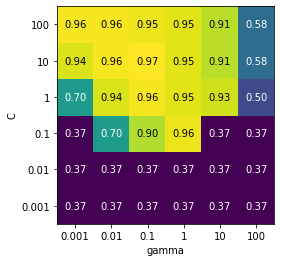

In [31]:
import mglearn

# results['mean_test_score'] # 평균값은 5개에 대한 평균값이므로 5를 뺀 6*6개가 나와야 한다(param_grid, gamma). 36개의 값 행 방향 , 열방향 감마
scores = results['mean_test_score'].values.reshape(6, 6)
#print(scores)
mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', yticklabels=param_grid['C'], xticklabels=param_grid['gamma'])

In [32]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100], 
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, 
              {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True) 
grid_search.fit(X_train, y_train)
print("최적 파라미터: {}".format(grid_search.best_params_)) 
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_)) 

최적 파라미터: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.99


In [36]:
pd.DataFrame(grid_search.cv_results_).iloc[:, 4:].T.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,...,0.941176,0.941176,0.882353,0.588235,0.352941,0.941176,0.882353,1,1,0.941176


In [37]:
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}

gsc = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True) # 반복문 돌릴 필요 없이 값만 주면 됨

scores = cross_val_score(gsc, iris.data, iris.target, cv=5)

print(scores, scores.mean())

[0.96666667 1.         0.96666667 0.96666667 1.        ] 0.9800000000000001
